https://thebook.io/080324/part05/ch18/

### 18장 시퀀스 배열로 다루는 순환 신경망(RNN)    
순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법

?LSTM(Long Short-Term Memory)   
길게 기억할 것과 짧게 기억할 것을 구분하여 처리  
참고 https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr

1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기  

In [1]:
from tensorflow.keras import models, layers 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# num_words=1000 빈도수 상위 1000번째까지의 단어를 빈도수대로 정렬

In [3]:
print('카테고리:', np.max(y_train) + 1)
print('학습용 뉴스 기사:', len(X_train))
print('테스트용 뉴스 기사:', len(X_test))

카테고리: 46
학습용 뉴스 기사: 8982
테스트용 뉴스 기사: 2246


In [4]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 기사 길이 패딩처리 (100개)
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [6]:
print(y_train[:5])

[3 4 3 4 4]


In [7]:
# 원핫인코딩 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(y_train[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
# Embedding(1000, 100) 단어 인덱스(1부터 999까지 999개) +1 출력을 100차원으로
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


W.shape = input x output  
B.shape = 1 x output

model.add(layers.Embedding(1000, 100))    
1000x100 = **100,000**   
model.add(layers.LSTM(100, activation='tanh'))    
input = 100 + 100 (이전 cell의 output 100과 지금 LSTM의 input 100이 concat됨)   
output = 100   
(100+100)x100 +100 = 20,100 *4(4개의 신경망) = **80,400**  
model.add(layers.Dense(46, activation='softmax'))  
100x46 +46 = **4646**

![18.png](18.png)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [12]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
450/450 [==============================] - 18s 34ms/step - loss: 2.2513 - accuracy: 0.4276 - val_loss: 1.8540 - val_accuracy: 0.5396
Epoch 2/20
450/450 [==============================] - 14s 32ms/step - loss: 1.9053 - accuracy: 0.5145 - val_loss: 1.7783 - val_accuracy: 0.5392
Epoch 3/20
450/450 [==============================] - 15s 32ms/step - loss: 1.6939 - accuracy: 0.5640 - val_loss: 1.6668 - val_accuracy: 0.5703
Epoch 4/20
450/450 [==============================] - 15s 33ms/step - loss: 1.5869 - accuracy: 0.5966 - val_loss: 1.5859 - val_accuracy: 0.6091
Epoch 5/20
450/450 [==============================] - 16s 36ms/step - loss: 1.4852 - accuracy: 0.6229 - val_loss: 1.5196 - val_accuracy: 0.6296
Epoch 6/20
450/450 [==============================] - 14s 32ms/step - loss: 1.3461 - accuracy: 0.6611 - val_loss: 1.3896 - val_accuracy: 0.6496
Epoch 7/20
450/450 [==============================] - 15s 32ms/step - loss: 1.2169 - accuracy: 0.6895 - val_loss: 1.3294 - val_accuracy:

In [14]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 11ms/step - loss: 1.2745 - accuracy: 0.7199
Test Accuracy: 0.7199


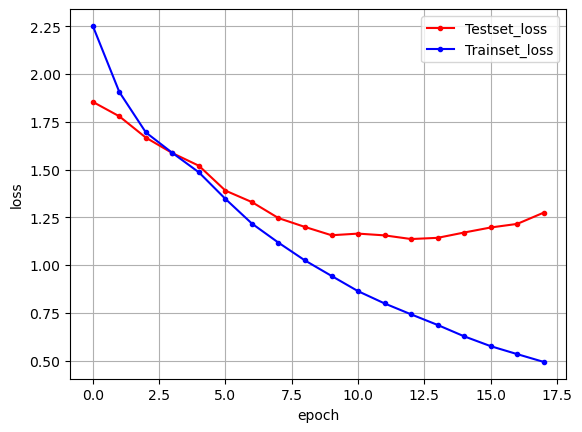

In [15]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()